# CSCI443 Lecture 13 Notes


In [104]:
import sys
print(f"Python kernel version: {sys.version}")

Python kernel version: 3.11.7 (main, Dec 15 2023, 12:09:56) [Clang 14.0.6 ]


## 1. Confidence Intervals In Detail

We already discussed confidence intervals, but I want to go into more detail
on what they are and how they work.

A confidence interval specifies a range of values which is likely to contain the 
true value of a population parameter, based on the sample statistic and the 
level of confidence chosen.

Slightly more formally, a p% confidence interval means that if we were to take many
sample sets from the population and construct a confidence interval from each sample
set in the same way, p% of those intervals would contain the true population parameter. 

I would suggest reviewing the notes for lecture 11 before proceeding.


## 2. Computing a single confidence interval

We can compute a confidence interval for any statistic.  A *statistic* is an estimate of a 
distribution parameter.  So far we have used the sample mean as a statistic that estimates
the distribution mean.  I will continue to use the sample mean as an estimate of the
distribution mean for purposes of illustration, but keep mind that the sample standard
deviation is also a statistic, but it estimates the distribution standard deviation, and 
analogously for statistcs that estimate other distribution parameters.

1. We compute the sample mean $\bar{x}$.
2. We note how big is $n$.  If $n > 30$ we may use a Gaussian approximation for the sampling distribution of the sample mean.  (We will come back to handle the case when $n < 30$).
3. Compute the sample standard deviation $s_x$ and use this as an estimate of $\sigma$.
4. Compute the standard error based on $s_x$.

$$SE_s = \frac{s_x}{\sqrt{n}}$$

5. For a given confidence level $p$.  Sometimes we  use the term *significance level* $\alpha$ where $\alpha=1-p$, compute the critical Z-score for the given confidence level.

$$Z_{\alpha} = \Phi^{-1}(1-\alpha/2)$$

or 

$$Z_p = \Phi^{-1}\bigg(1-\frac{1-p}{2}\bigg)$$

6. Compute upper and lower bounds of the confidence interval.

$$CI_{lo} = \bar{x} - Z_p \cdot SE_s$$

$$CI_{hi} = \bar{x} + Z_p \cdot SE_s$$

In Step 5, I use the function $\Phi^{-1}(p)$.  This is the inverse of the Gaussian
CDF.  I illustrate $\Phi^{-1}(p)$ below and include annotations for the case when 
$P[X \leq x] = 90%$.  But where does the $1-\frac{1-p}{2}$ come from?

A:

$$P[-x \leq X \leq x] = \Phi(x)-\Phi(-x)$$

This can be rewritten as 1 - upper tail - lower tail.
The probability of a sample landing in the upper tail is given by 

$$P[\text{landing in upper tail}] = 1-P[x \leq X] = 1- \Phi(x)$$

Since the distribution is symmetric, both tails are equal, and thus 

$$P[\text{landing in either tail}] = 2 \cdot ( 1 - \Phi(x))$$

The probability that $X \in [-x, x]$ is $1-P[\text{landing in either tail}]$ so

$$P[-x \leq X \leq x] = 1 - 2(1 - \Phi(x)) = p$$

Rearranging yields

$$1-p = 2(1-\Phi(x))$$

$$\frac{1-p}{2} = 1-\Phi(x)$$

$$\Phi(x) = 1-\frac{1-p}{2}$$

$$\Phi^{-1}(\Phi(x)) = \Phi^{-1}\bigg(1-\frac{1-p}{2}\bigg)$$

$$Z_p = x = \Phi^{-1}\bigg(1-\frac{1-p}{2}\bigg)$$  

Simplifying yields

$$\boxed{Z_p = \Phi^{-1}\bigg(\frac{1+p}{2}\bigg)}$$


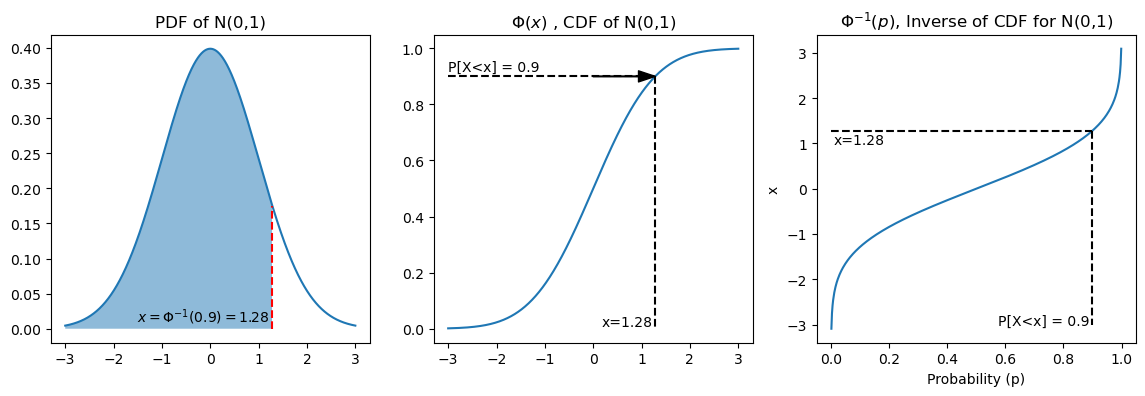

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Define the points for the plots
x_points = np.linspace(-3, 3, 1000)
pdf_points = norm.pdf(x_points)
cdf_points = norm.cdf(x_points)

p_points = np.linspace(0.001, 0.999, 500)
ppf_points = norm.ppf(p_points)

# Calculate the x value for the 90th percentile
x_90th = norm.ppf(0.9)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Plot PDF with the area under the curve filled for the bottom 90%
ax[0].plot(x_points, pdf_points, label='PDF of N(0,1)')
ax[0].fill_between(x_points, pdf_points, where=(x_points <= x_90th), alpha=0.5)
ax[0].vlines(x_90th, 0, norm.pdf(x_90th), colors='r', linestyles='dashed', label=f'x = $\Phi^{{-1}}$(0.9) = {x_90th:.2f}')
ax[0].text(x_90th-0.05, 0.01, f'$x=\Phi^{{-1}}(0.9)={x_90th:.2f}$', ha='right')
#ax[0].legend()
ax[0].set_title('PDF of N(0,1)')

# Plot CDF with arrow annotations
ax[1].plot(x_points, cdf_points, label='CDF of N(0,1)')
ax[1].annotate('', xy=(x_90th, 0.9), xytext=(0, 0.9),
               arrowprops=dict(facecolor='black', shrink=0, width=0.5, headwidth=8))
ax[1].annotate('', xy=(x_90th, 0), xytext=(x_90th, 0),
               arrowprops=dict(facecolor='black', shrink=0, width=0.5, headwidth=8))
ax[1].vlines(x_90th, 0.9, 0, colors='black', linestyles='dashed')
ax[1].hlines(0.9, -3, x_90th, colors='black', linestyles='dashed')
ax[1].text(-3, 0.91, 'P[X<x] = 0.9', va='bottom')
ax[1].text(x_90th-0.05, 0.01, f'x={x_90th:.2f}', ha='right')
ax[1].set_title('$\Phi(x)$ , CDF of N(0,1)')

ax[2].plot(p_points, ppf_points)
ax[2].vlines(0.9, x_90th, -3, colors='black', linestyles='dashed')
ax[2].hlines(x_90th, 0, 0.9, colors='black', linestyles='dashed')
ax[2].text(0.89, -3, 'P[X<x] = 0.9', ha='right')
ax[2].text(0.01, x_90th-0.05, f'x={x_90th:.2f}', va='top')
ax[2].set_title('$\Phi^{-1}(p)$, Inverse of CDF for N(0,1)')
ax[2].set_xlabel('Probability (p)')
ax[2].set_ylabel('x')

plt.show()


Sometimes the inverse of the CDF is called the *Percent Point Function* (PPF).
In Python we can obtain $\Phi^{-1}$ using the `norm.ppf` function from 
the package `scipy.stats`.

$$\boxed{Z_p = \Phi^{-1}\bigg(\frac{1+p}{2}\bigg)}$$

can be implemented as 

    z_p = norm.ppf((1+p)/2)

I provide a complete implementation of how to inplement a Confidence Interval (CI)
using the Gaussian assumption below.

In [5]:
import numpy as np
from math import sqrt
from scipy.stats import norm

"""Computes a single confidence iterval of the mean using a Gaussian assumption
for the sampling distribution.  confidence_level is a value in [0,100].
"""
def compute_gaussian_confidence_interval(samples, confidence_level):
    sample_mean = np.mean(samples)                 # (1)
    n = len(samples)                               # (2) 
    sample_std = np.std(samples, ddof=1)           # (3) 
    stderr = sample_std  / sqrt(n)                 # (4)

    p = confidence_level / 100
    z_p = norm.ppf((1 + p) / 2)
    
    lower_bound = sample_mean - z_p * stderr
    upper_bound = sample_mean + z_p * stderr
    return sample_mean, lower_bound, upper_bound

# unit test compute_gaussian_confidence_interval
mean, ci_lo, ci_hi = compute_gaussian_confidence_interval([1, 2, 1, 2, 1, 2], 95)
EPSILON = 0.0001
assert 1.5 - EPSILON < mean < 1.5 + EPSILON
SE = sqrt(1/5 * (.5**2)*6)/sqrt(6)
expected_ci_lo = 1.5-1.96*SE
expected_ci_hi = 1.5+1.96*SE
# print(f"mean={mean}, ci_lo={ci_lo}, ci_hi={ci_hi}, expected_ci_lo={expected_ci_lo}, expected_ci_hi={expected_ci_hi}")
assert expected_ci_lo - EPSILON < ci_lo < expected_ci_lo + EPSILON
assert expected_ci_hi - EPSILON < ci_hi < expected_ci_hi + EPSILON
    

## 4. What about when the underlying distribution is Gaussian?

When the underlying distribution is Gaussian, the sampling distribution is also Gaussian, but the sampling distribution has a standard deviation that obeys the stderr, i.e.,

$$SE = \frac{\sigma}{\sqrt{n}}$$

Below we plot the sampling distribution of the mean where the sample means are drawn from $N(0,1)$.
To illustrate that the sample means are computed from samples drawn from a $N(0,1)$ we
overlay the plot with the pdf of a N(0,1) distribution.

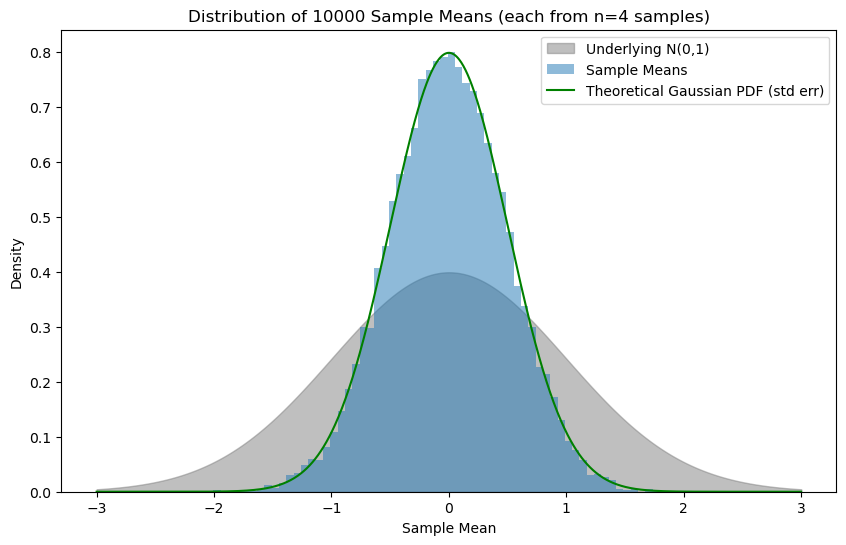

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_sampling_distribution(R, n):
    # Generate R sample means from n samples each, from N(0,1)
    sample_means = [np.mean(np.random.normal(0, 1, n)) for _ in range(R)]
    
    # Parameters for the theoretical Gaussian sampling distribution (mean=0, std dev=1/sqrt(n))
    std_error = 1 / np.sqrt(n)
    
    # Plotting
    plt.figure(figsize=(10, 6))

    # Also overlay the underlying Gaussian distribution N(0,1)
    x_values = np.linspace(-3, 3, 1000)
    original_pdf = norm.pdf(x_values, 0, 1)
    plt.fill_between(x_values, original_pdf, color='gray', alpha=0.5, label='Underlying N(0,1)')
    # x_uniform = np.linspace(a, b, 1000)
    # pdf_uniform = uniform.pdf(x_uniform, loc=a, scale=b-a)

    
    # Relative frequency histogram of the R sample means
    plt.hist(sample_means, bins='auto', density=True, alpha=0.5, label='Sample Means')
    
    # Overlay the theoretical Gaussian sampling distribution
    sampling_pdf = norm.pdf(x_values, 0, std_error)
    plt.plot(x_values, sampling_pdf, 'g-', label='Theoretical Gaussian PDF (std err)')
        
    # Adding labels and legend
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.title(f'Distribution of {R} Sample Means (each from n={n} samples)')
    plt.legend()
    
    # Show plot
    plt.show()

# Example usage
plot_sampling_distribution(R=10000, n=4)



## 5. Many confidence intervals.

When we generate many p% confidence intervals, we expect that p% of the confidence intervals should include the
true mean of the underlying distribution.  To make the issue obvious from a small number of intervals, we choose
a confidence level of 50%.  We then generate many such 50% CIs to show that roughly 50% contain the true mean for the case when I know that the underlying distribution is $N(0,1)$ and thus $\sigma=1$.

plot_gaussian_confidence_intervals(50, 3, 40)


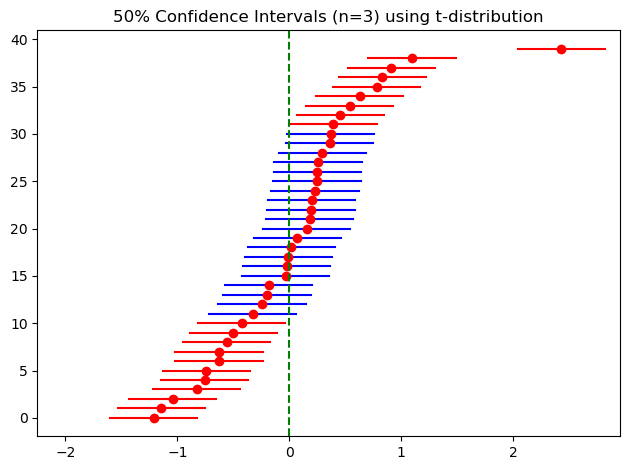

50.0% intervals contain the true mean.


In [7]:
def gen_gaussian_confidence_intervals(confidence_level: [int, float], n: int, num_intervals:int, 
                                       sample_std: bool, seed = None) -> int:
    """
    Generates p% confidence intervals for samples from a N(0,1) distribution,
    using the t-distribution for the calculation.

    Parameters:
    - confidence_level: The confidence level (as a percentage, e.g., 95 for 95%)
    - n: The sample size for each interval
    - num_intervals: The number of intervals to generate

    Returns:
    - A tuple of arrays: (lower bounds, upper bounds, sample means)
    """
    assert seed is not None
    np.random.seed(seed)
    
    # critical z-score for the specified confidence level
    p = confidence_level / 100
    z_score = norm.ppf((1 + p) / 2)
    
    # Generate samples
    samples = np.random.normal(0, 1, (num_intervals, n))
    
    # Calculate sample means and standard errors
    sample_means = np.mean(samples, axis=1)
    if sample_std:
        s = np.std(samples, axis=1, ddof=1)  # Sample standard deviation with Bessel's correction
    else:
        s = 1
    se = s / np.sqrt(n)  # Standard error
    
    # Calculate confidence intervals using the t-distribution
    lower_bounds = sample_means - z_score * se
    upper_bounds = sample_means + z_score * se
    
    return (lower_bounds, upper_bounds, sample_means)


def plot_gaussian_confidence_intervals(confidence_level: [int, float], 
                                       n: int, num_intervals:int, 
                                       sample_std: bool, ordered: bool = False, 
                                       seed = None) -> int:
    """
    Generates and plots {confidence_level}% confidence intervals, both in 
    the original and sorted order.  Intervals that do not overlap with the true
    mean are colored in red.
    
    Parameters:
    - confidence_level: The confidence level (e.g., 95 for 95%)
    - n: The sample size
    - num_intervals: The number of intervals to generate
    - sample_std: true means use the sample standard deviation when computing stderr.
      Otherwise, use the distribution standard deviation.
    - ordered: whether the intervals should be placed in increasing order of the
      sample mean.

    Returns: number of interval that contain the true mean.
    """
    print(f"plot_gaussian_confidence_intervals({confidence_level}, {n}, {num_intervals})")

    num_inside = 0
    
    # Generate confidence intervals
    lower_bounds, upper_bounds, sample_means = gen_gaussian_confidence_intervals(
        confidence_level, n, num_intervals, sample_std, seed)

    # Plot in sorted order by sample mean
    if ordered:
        sorted_indices = np.argsort(sample_means)
    else:
        sorted_indices = range(len(sample_means))
    for i, idx in enumerate(sorted_indices):
        # Check if the interval contains the true mean
        if lower_bounds[idx] > 0 or upper_bounds[idx] < 0:
            color = 'r'  
        else:
            color = 'b'
            num_inside += 1
        plt.plot([lower_bounds[idx], upper_bounds[idx]], [i, i], color + '-')
        plt.plot(sample_means[idx], i, 'ro')
    plt.axvline(x=0, color='g', linestyle='--', label='True Mean (0)')
    plt.title(f'{confidence_level}% Confidence Intervals (n={n}) using t-distribution')
    plt.tight_layout()
    plt.xlim(-2.25, 2.95)

    output_file = f'gaussian_underlay_t_{confidence_level}%_ci_n{n}_ord{int(ordered)}_seed{seed}.png'
    plt.savefig(output_file)
    
    plt.show()
    return num_inside


confidence_level = 50
n = 3
num_intervals = 40

num_inside = plot_gaussian_confidence_intervals(confidence_level, n, num_intervals,
                                                sample_std=False, ordered=True, seed=21)
print(f"{num_inside/num_intervals*100}% intervals contain the true mean.")


### 5.1 Gaussian CI with Unknown σ

Usually we do not know the distribution std deviation, at best we can compute the sample
standard deviation, but this causes a problem because now we have to statistics computed
from the same samples.  This adds variability to the confidence intervals resulting
in a reduction in the number of sample intervals that include the true mean.

plot_gaussian_confidence_intervals(50, 3, 40)


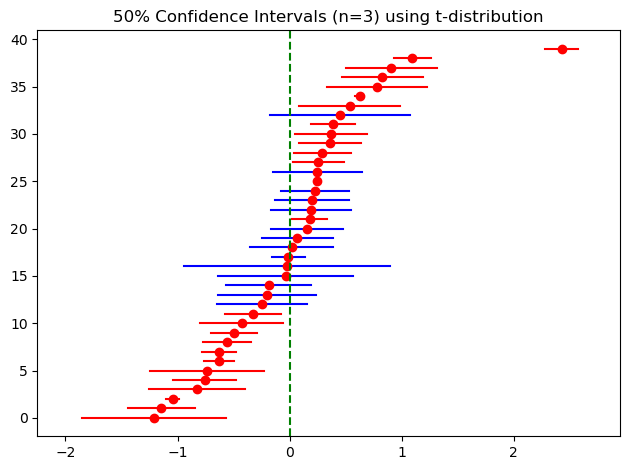

35.0% intervals contain the true mean.


In [8]:

num_inside = plot_gaussian_confidence_intervals(confidence_level, n, num_intervals,
                                                sample_std=True, ordered=True, seed=21)
print(f"{num_inside/num_intervals*100}% intervals contain the true mean.")

When we use the sample standard deviation rather than the distribution 
standard deviation, we see that resulting 50% confidence intervals fail
to include the true mean 50% of the time.  In fact they only contain the
true mean 35% of the time.   As a result our function for generating
50% confidence intervals fails to generate 50% confidence intervals.

We need a distribution that takes into account the additional variability
introduced by estimating the standard deviation from samples.

## 6. Student t-distribution

The Student t-distribution is broader than Gaussian to accommodate the increased
variability introduced by estimating the standard deviation from a small number
of samples.  In the plot below we show the Student t-distribution with 
progressively larger value of $n$.  As the number of samples $n$ increases,
the Student t-distribution approaches a Gaussian.

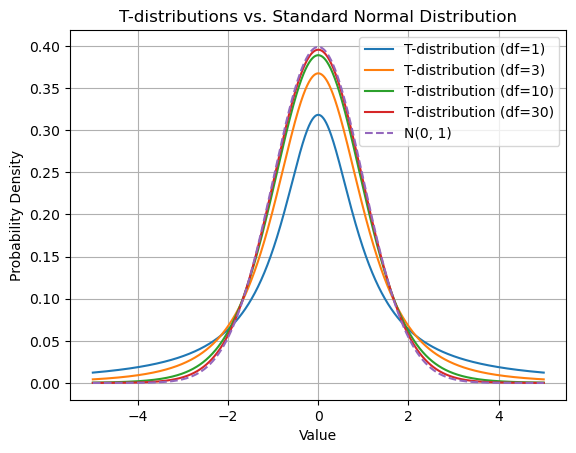

In [127]:
# Values of degrees of freedom to illustrate
dfs = [1, 3, 10, 30]

# Generate t-values for plotting
t_values = np.linspace(-5, 5, 1000)

# Plot the t-distributions for different degrees of freedom
for df in dfs:
    plt.plot(t_values, t.pdf(t_values, df), label=f'T-distribution (df={df})')

# Plot the standard normal distribution for comparison
plt.plot(t_values, norm.pdf(t_values, 0, 1), label='N(0, 1)', linestyle='--')

plt.title('T-distributions vs. Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


The Student t-distribution assumes that the underlying sample distribution
is Gaussian.  When the stample distribution is far from Gaussian, the corrections
for using the sample standard deviation may be insufficient for a p% confidence
interval to contain the true mean p% of the time.  I leave it up to the
student to try using the Student t-distribution with non-Gaussian underlying
distributions.

To further illustrate the excess leeway allowed by the Student t-distribution
I plot the range about the mean that includes 95% of the probability mass
for the Student t-distribution and a Gaussian distribution N(0,1). 

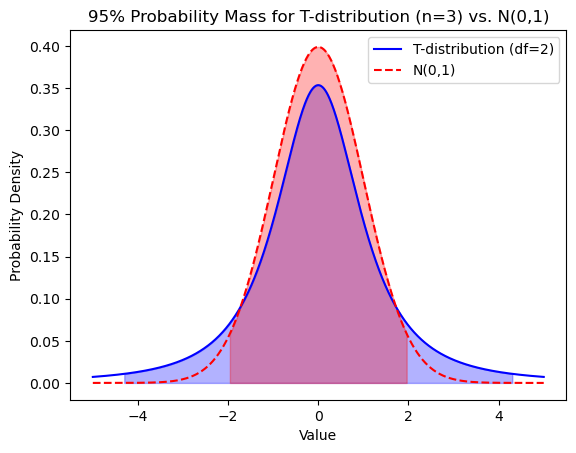

In [128]:
# Set the degrees of freedom for n=3
df = 3 - 1  # Degrees of freedom for t-distribution, n-1

# Calculate critical t-value for 95% CI using t-distribution
t_critical = t.ppf((1 + 0.95) / 2, df)

# Calculate critical z-value for 95% CI using standard normal distribution
z_critical = norm.ppf((1 + 0.95) / 2)

# Define a range for plotting
x = np.linspace(-5, 5, 1000)

# Plot t-distribution with df=2 and N(0,1)
plt.plot(x, t.pdf(x, df), "b-", label=f"T-distribution (df={df})")
plt.plot(x, norm.pdf(x, 0, 1), "r--", label="N(0,1)")

# Highlight the 95% probability mass area for t-distribution
x_fill_t = np.linspace(-t_critical, t_critical, 1000)
plt.fill_between(x_fill_t, t.pdf(x_fill_t, df), color='blue', alpha=0.3)

# Highlight the 95% probability mass area for N(0,1)
x_fill_z = np.linspace(-z_critical, z_critical, 1000)
plt.fill_between(x_fill_z, norm.pdf(x_fill_z, 0, 1), color='red', alpha=0.3)

plt.legend()
plt.title("95% Probability Mass for T-distribution (n=3) vs. N(0,1)")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()


### 6.1 Computing a t-score

Here is a function that shows how to compute the t-score given a 
conficence level $p$ and the number of samples $n$.

In [139]:
from scipy.stats import t

def t_score(p, n):
    df = n-1
    return t.ppf(1-(1-p/100)/2, df)
    
# Degrees of freedom = n-1.
n=3

# Calculate the critical t-value for 95% CI
t_95 = t_score(95, 3)  # 0.975 accounts for the upper tail in a two-tailed test for 95% CI
print(f"t_95={t_95}")
# print(f"t_95={t.ppf(0.975, 2)}")

t_50 = t_score(50, 3)
print(f"t_50={t_50}")

t_95=4.302652729911275
t_50=0.8164965809277266


### 6.2 Computing a single CI using a t-distribution as sampling distribution

In [153]:
import numpy as np
from math import sqrt
from scipy.stats import t

"""Computes a single confidence iterval of the mean using a t-distribuion 
assumption for the sampling distribution.  confidence_level is a value in [0,100].
"""
def compute_t_confidence_interval(samples, confidence_level):
    sample_mean = np.mean(samples)                 # (1)
    n = len(samples)                               # (2) 
    sample_std = np.std(samples, ddof=1)           # (3) 
    stderr = sample_std  / sqrt(n)                 # (4)

    # Calculate critical t-value for {confidence_level}% CI using t-distribution
    p = confidence_level / 100
    df = n - 1  # Degrees of freedom for t-distribution, n-1
    t_p = t.ppf((1 + p) / 2, df)
    
    lower_bound = sample_mean - t_p * stderr
    upper_bound = sample_mean + t_p * stderr
    return sample_mean, lower_bound, upper_bound

# unit test compute_gaussian_confidence_interval
mean, ci_lo, ci_hi = compute_t_confidence_interval([1, 2, 1, 2, 1, 2], 95)
EPSILON = 0.0001
assert 1.5 - EPSILON < mean < 1.5 + EPSILON
SE = sqrt(1/5 * (.5**2)*6)/sqrt(6)
df = 6 - 1  # degrees of freedom

# Critical t-score for 95% CI with df=5
t_95 = t.ppf(0.975, df)

expected_ci_lo = 1.5-t_95*SE
expected_ci_hi = 1.5+t_95*SE
print(f"mean={mean}, ci_lo={ci_lo}, ci_hi={ci_hi}, expected_ci_lo={expected_ci_lo}, expected_ci_hi={expected_ci_hi}")
assert expected_ci_lo - EPSILON < ci_lo < expected_ci_lo + EPSILON
assert expected_ci_hi - EPSILON < ci_hi < expected_ci_hi + EPSILON
    

mean=1.5, ci_lo=0.9252004271603185, ci_hi=2.0747995728396815, expected_ci_lo=0.9252004271603184, expected_ci_hi=2.0747995728396815


### 6.3 Showing the t-distribution correction for sample standard deviation.

We now show how the student t-distribution can be used in place of the 
Gaussian sampling distribution in order to correct for the additional
variability introduced by using the sample standard deviation in the
comptutation of stderr.

plot_t_confidence_intervals(50, 3, 40, ...)


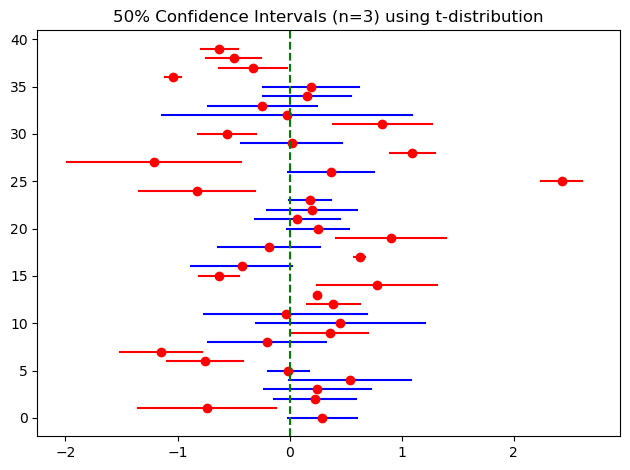

plot_t_confidence_intervals(50, 3, 40, ...)


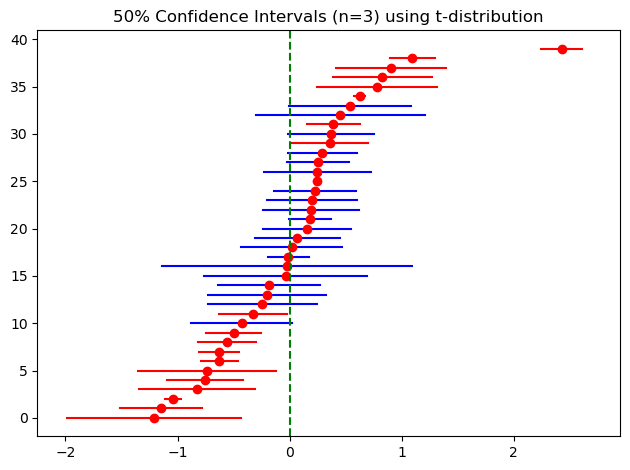

50.0% intervals contain the true mean.


In [9]:
from scipy.stats import t

def gen_t_confidence_intervals(p: [int, float], n: int, num_intervals:int, 
                               sample_std: bool, 
                               seed = None) -> int:
    """
    Generates p% confidence intervals for samples from a N(0,1) distribution,
    using the t-distribution for the calculation.

    Parameters:
    - p: The confidence level (as a percentage, e.g., 95 for 95%)
    - n: The sample size for each interval
    - num_intervals: The number of intervals to generate

    Returns:
    - A tuple of arrays: (lower bounds, upper bounds, sample means)
    """
    assert seed is not None
    np.random.seed(seed)

    # Degrees of freedom for the t-distribution
    df = n - 1
    
    # t-score for the specified confidence level
    t_score = t.ppf((1 + p/100) / 2, df)
    
    # Generate samples
    samples = np.random.normal(0, 1, (num_intervals, n))
    
    # Calculate sample means and standard errors
    sample_means = np.mean(samples, axis=1)
    s = np.std(samples, axis=1, ddof=1)  # Sample standard deviation with Bessel's correction
    se = s / np.sqrt(n)  # Standard error
    
    # Calculate confidence intervals using the t-distribution
    lower_bounds = sample_means - t_score * se
    upper_bounds = sample_means + t_score * se
    
    return (lower_bounds, upper_bounds, sample_means)


def plot_t_confidence_intervals(confidence_level: [int, float], n: int, num_intervals:int, 
                              sample_std: bool, ordered: bool = False, seed = None) -> int:
    """
    Generates and plots p% confidence intervals, both in the original and sorted order.
    Intervals that do not overlap with the true mean are colored in red.
    
    Parameters:
    - confidence_level: The confidence level (e.g., 95 for 95%)
    - n: The sample size
    - num_intervals: The number of intervals to generate
    - ordered: whether the intervals should be placed in increasing order of the
      sample mean.

    Returns: number of interval that contain the true mean.
    """
    print(f"plot_t_confidence_intervals({confidence_level}, {n}, {num_intervals}, ...)")

    num_inside = 0
    
    # Generate confidence intervals
    lower_bounds, upper_bounds, sample_means = gen_t_confidence_intervals(
        confidence_level, n, num_intervals, sample_std, seed)

    # Plot in sorted order by sample mean
    if ordered:
        sorted_indices = np.argsort(sample_means)
    else:
        sorted_indices = range(len(sample_means))
    for i, idx in enumerate(sorted_indices):
        # Check if the interval contains the true mean
        if lower_bounds[idx] > 0 or upper_bounds[idx] < 0:
            color = 'r'  
        else:
            color = 'b'
            num_inside += 1
        plt.plot([lower_bounds[idx], upper_bounds[idx]], [i, i], color + '-')
        plt.plot(sample_means[idx], i, 'ro')
    plt.axvline(x=0, color='g', linestyle='--', label='True Mean (0)')
    plt.title(f'{confidence_level}% Confidence Intervals (n={n}) using t-distribution')
    plt.tight_layout()
    plt.xlim(-2.25, 2.95)

    output_file = f'gaussian_underlay_t_{confidence_level}%_ci_n{n}_ord{int(ordered)}_seed{seed}.png'
    plt.savefig(output_file)
    
    plt.show()
    return num_inside

confidence_level = 50
n = 3
num_intervals = 40
num_inside = plot_t_confidence_intervals(confidence_level, n, num_intervals,
                                         sample_std=True, seed=21)
num_inside2 = plot_t_confidence_intervals(confidence_level, n, num_intervals,
                                          sample_std=True, ordered=True, seed=21)
assert num_inside == num_inside2
print(f"{num_inside/num_intervals*100}% intervals contain the true mean.")


**Viola!**

We now have 50% confidence intervals that are large enough to include
the true mean 50% of the mean even when we compute the standard error using
the sample standard deviation.